In [39]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn libraries for preprocessing data and clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# metrics
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer





In [6]:
# Set up the visualization style
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')


In [23]:
# 1: Loading Dataset using Pandas
# Load the dataset and display the first 10 rows
df = pd.read_csv('wine_dataset.csv', sep=';')
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,"7,4","0,7",0,"1,9","0,076",11,34,"0,9978","3,51","0,56","9,4"
1,1,"7,8","0,88",0,"2,6","0,098",25,67,"0,9968","3,2","0,68","9,8"
2,2,"7,8","0,76","0,04","2,3","0,092",15,54,"0,997","3,26","0,65","9,8"
3,3,"11,2","0,28","0,56","1,9","0,075",17,60,"0,998","3,16","0,58","9,8"
4,4,"7,4","0,7",0,"1,9","0,076",11,34,"0,9978","3,51","0,56","9,4"


In [8]:
# as we can see there is still a problem with our df representaion which is showing float values like string,
# to handle this situation we use replace() method to replace ',' with '.'
df = df.replace(',', '.', regex=True).astype(float)

df.head(3)


,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,1.0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,2.0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [30]:
#printing informations about our df using info() method:
df.info()

# Check for missing values
print("\nMissing values in the dataset:")

#checking for missing values:
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    1143 non-null   int64 
 1   fixed acidity         1143 non-null   object
 2   volatile acidity      1143 non-null   object
 3   citric acid           1143 non-null   object
 4   residual sugar        1143 non-null   object
 5   chlorides             1143 non-null   object
 6   free sulfur dioxide   1143 non-null   object
 7   total sulfur dioxide  1143 non-null   object
 8   density               1143 non-null   object
 9   pH                    1143 non-null   object
 10  sulphates             1143 non-null   object
 11  alcohol               1143 non-null   object
dtypes: int64(1), object(11)
memory usage: 107.3+ KB

Missing values in the dataset:


Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

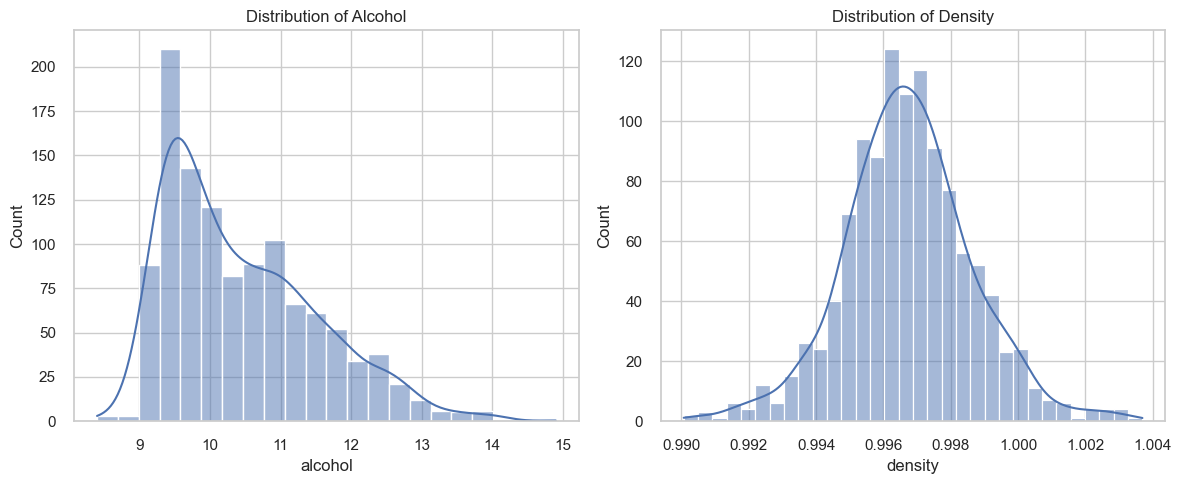

In [10]:
# 2: Exploratory Data Analysis (EDA)
# Distribution of 'alcohol' and 'density'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['alcohol'], kde=True)
plt.title('Distribution of Alcohol')

plt.subplot(1, 2, 2)
sns.histplot(df['density'], kde=True)
plt.title('Distribution of Density')

plt.tight_layout()
plt.show()


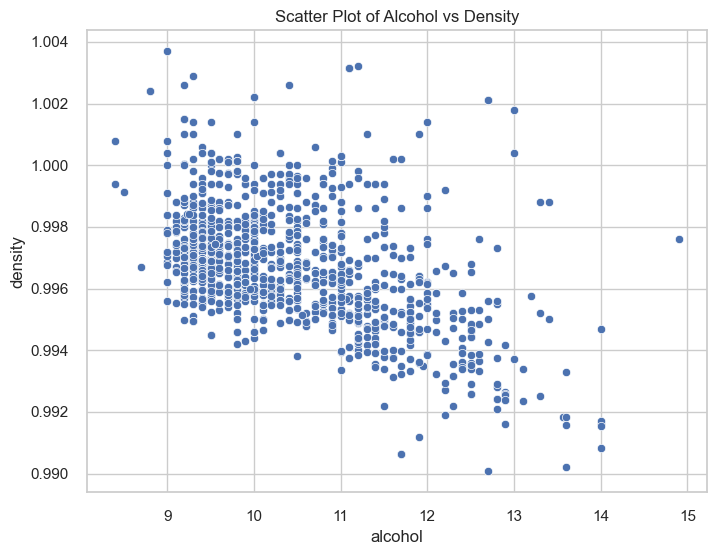

In [11]:
# Scatter plot to visualize relationship between 'alcohol' and 'density'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='density', data=df)
plt.title('Scatter Plot of Alcohol vs Density')
plt.show()

In [12]:
# 3: Data Preprocessing
# Standardize the 'alcohol' and 'density' columns
features = df[['alcohol', 'density']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [13]:
# 4: Principal Component Analysis (PCA) for dimensionality reduction (optional, as we only have 2 features)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Convert PCA result to DataFrame for visualization
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])


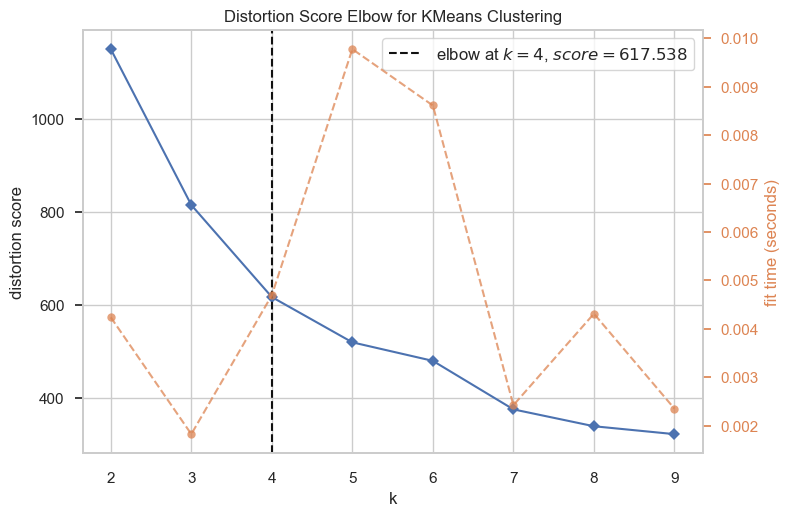

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# 5: Finding the optimal number of clusters using the Elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(scaled_features)
visualizer.show()


In [15]:
# 6: K-Means Clustering
optimal_clusters = 3  # Set based on elbow method result
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(scaled_features)
labels = kmeans.labels_

In [16]:
# Add cluster labels to PCA DataFrame
pca_df['Cluster'] = labels

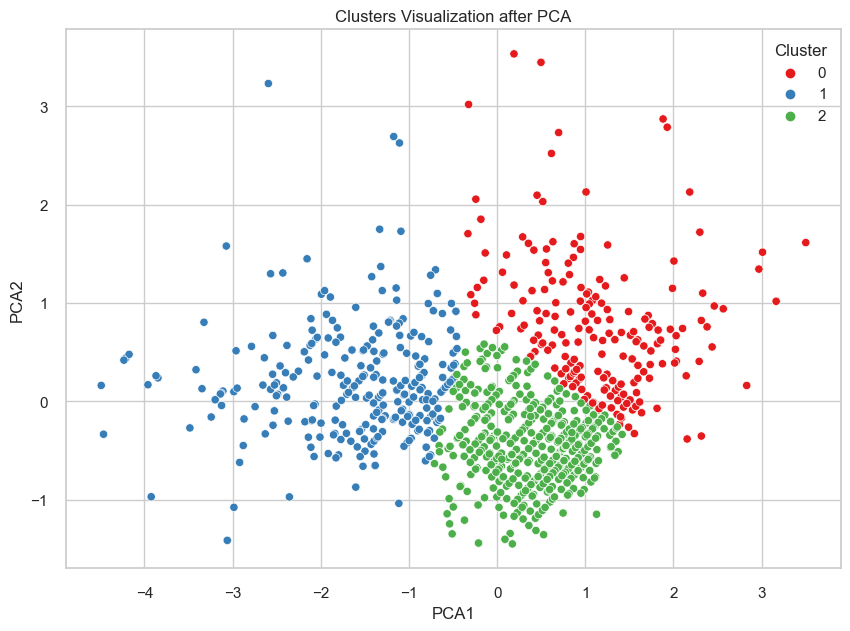

In [17]:
# 7: Visualization of Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Clusters Visualization after PCA')
plt.show()


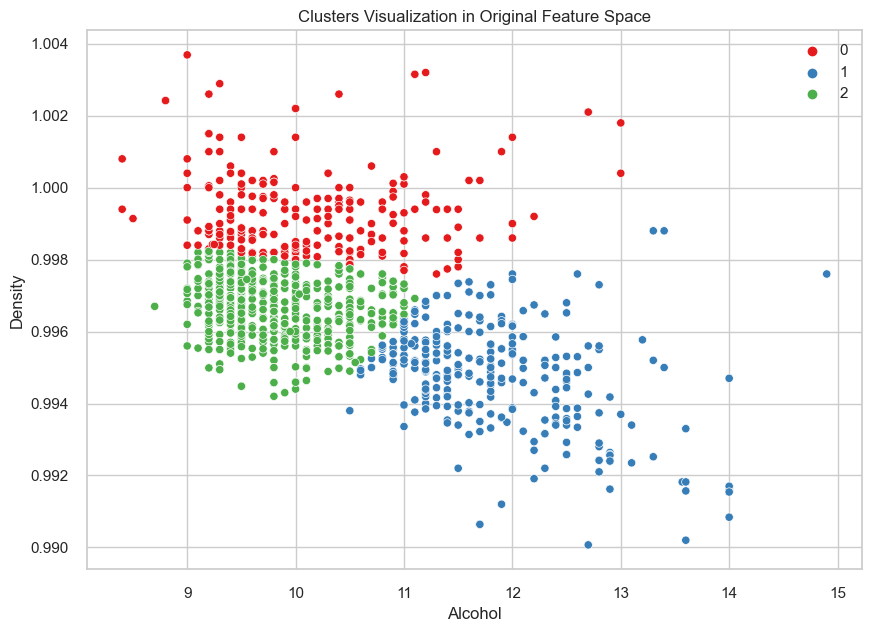

In [18]:

# 8: Visualization in Original Feature Space
plt.figure(figsize=(10, 7))
sns.scatterplot(x='alcohol', y='density', hue=labels, palette='Set1', data=features)
plt.title('Clusters Visualization in Original Feature Space')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()

In [19]:

# 9: Evaluation of Clustering
# Silhouette Score
score = silhouette_score(scaled_features, labels)
print(f'Silhouette Score: {score:.2f}')




Silhouette Score: 0.40


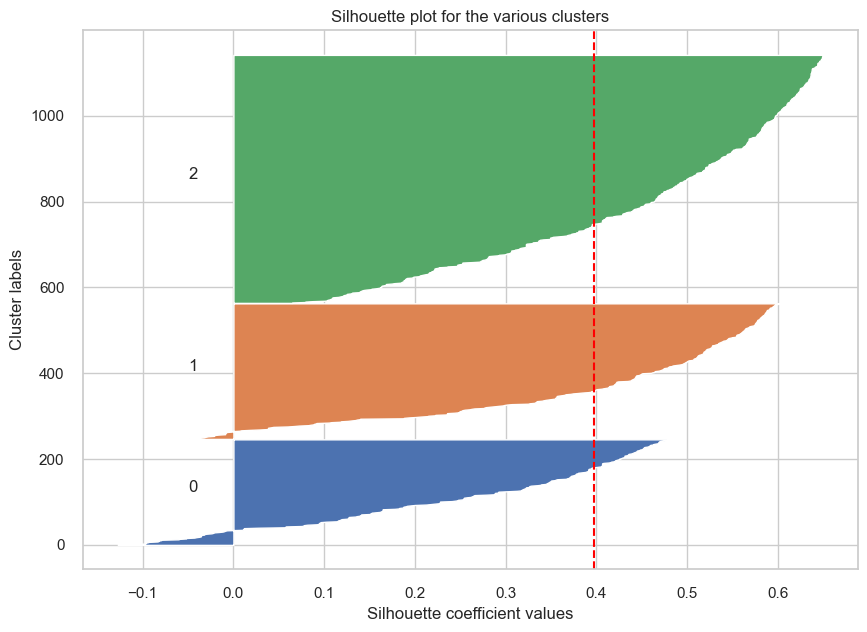

In [40]:
# Silhouette Analysis
silhouette_vals = silhouette_samples(scaled_features, labels)
plt.figure(figsize=(10, 7))
y_lower, y_upper = 0, 0
for i in range(optimal_clusters):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
    y_lower = y_upper
plt.title('Silhouette plot for the various clusters')
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster labels')
plt.axvline(x=silhouette_score(scaled_features, labels), color="red", linestyle="--")
plt.show()

In [20]:
# Detailed evaluation
print("\nCluster centers (in the original feature space):")
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(pd.DataFrame(original_centers, columns=['alcohol', 'density']))



Cluster centers (in the original feature space):
     alcohol   density
0  10.133266  0.999319
1  11.799632  0.994814
2   9.829578  0.996666


In [21]:

# Count of data points in each cluster
print("\nNumber of data points in each cluster:")
print(pd.Series(labels).value_counts())


Number of data points in each cluster:
2    579
1    317
0    247
Name: count, dtype: int64
